# Finance UFRN
On this NoteBook we will present our discoveries over constructions and investments all over UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE([UFRN](www.ufrn.br)).
All this made as a project for a subject on UFRN called `PROBABILIDADE`, where we choose some of several available open data about our university.

## Choosen Data
We decided to work on the financial values over UFRN, like how much money cost a specific work, how long it generally takes to finish a construction, the most expensive work, and so on. For that, we used the following 'csv' files:
- [obras.csv](http://dados.ufrn.br/dataset/a8b897f9-4659-44d4-842e-ac70ae21eb83/resource/067e7cad-934c-4134-a5d5-807915c074b4/download/obras.csv)
- [requisicaoobras.csv](http://dados.ufrn.br/dataset/15f55d0c-7ac8-4c1e-a73c-b0e37b9ef873/resource/0d923d18-1ffa-41d7-972f-33a12e9daf62/download/requisicaoobras.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
works = pd.read_csv("res/obras.csv", sep=';')
works_request = pd.read_csv("res/requisicaoobras.csv", sep=';')


In [3]:
# We start by just printing our choosen dataset.
pd.DataFrame(works).head()

,id_obra,descricao,periodo,qtd_dias,status_obra,licitacao,empresa,modalidade,valor,fonte_recurso,vigencia_projeto,projeto,id_unidade_responsavel,unidade_responsavel,Unnamed: 14
0,493,CONSTRUÇÃO DO BLOCO H DO SETOR DE AULAS TEÓRIC...,23/03/2005 - 19/11/2005,240,FINALIZADA,6/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 829.454,21",NaN,NaN,NaN,NaN,NaN,NaN
1,521,CONSTRUÇÃO DO BLOCO A1 DO SETOR DE AULAS TEÓRI...,04/05/2005 - 30/12/2005,240,FINALIZADA,7/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 833.702,12",NaN,20/04/2005 - 20/11/2005,19O ENECIC/2005 (852005),NaN,NaN,NaN
2,848,CONSTRUÇÃO DO SETOR DE ANTIBIÓTICOS PRODUÇÃO D...,02/06/2005 - 29/01/2006,240,FINALIZADA,4/2004,03.722.669/0001-85 - CONSTRUTORA CAGEO LTDA,CONCORRÊNCIA,"R$ 1.561.230,93",TESOURO - EDUCAÇÃO (112000000),NaN,NaN,252.0,NUCLEO DE PESQUISA EM ALIMENTOS E MEDICAMENTOS,NaN
3,925,Complementação da 2ª Etapa e Realização da 3ª ...,28/01/2005 - 22/01/2006,360,FINALIZADA,2/2004,40.761.454/0001-08 - AR PROJETOS & CONSTRUÇÕE...,CONCORRÊNCIA,"R$ 814.550,74",NaN,20/12/2002 - 31/07/2007,UFRN/CONV.133/02 - HUOL (862003),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN
4,182,CONSTRUÇÃO DO DEPARTAMENTO DE FISIOTERAPIA - CCS,08/02/2006 - 02/02/2007,360,FINALIZADA,1/2005,01.694.415/0001-75 - HASTE-HABITAÇÃO E SERVIÇ...,CONCORRÊNCIA,"R$ 1.455.865,61",NaN,20/12/2004 - 30/03/2010,CONVENIO 121/2004 UFRN (732005),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN


### Analyzing Works Times
On the next 3 cells, we will check, respectively, a construction's minimun time, max time and the mean of all these times.

In [4]:
# This cell creates 2 variables, one containing the minimun value and the other it's index.
works_min_time = works['qtd_dias'].min()
works_min_index_time = works['qtd_dias'].idxmin()

# Then, we print to observe it's values and costs.
print("The fastest work took",works_min_time,"days")
print("It also cost", works.iloc[works_min_index_time]['valor'])
pd.DataFrame(works.iloc[works_min_index_time])

The fastest work took 5 days
It also cost R$         8.320,70


,277
id_obra,2849
descricao,RECUPERAÇÃO DE ENLACE ÓPTICO NA AV. RODRIGUES ...
periodo,15/01/2007 - 19/01/2007
qtd_dias,5
status_obra,FINALIZADA
licitacao,585/2006
empresa,01.009.821/0001-51 - PROTELE ENGENHARIA LTDA
modalidade,DISPENSA DE LICITAÇÃO
valor,"R$ 8.320,70"
fonte_recurso,UNIV.FEDERAL DO RIO GRANDE DO NORTE (250154214)


In [5]:
# This cell creates 2 variables, one containing the maximun value and the other it's index.
works_max_time = works['qtd_dias'].max()
works_max_index_time = works['qtd_dias'].idxmax()

# Then, we print to observe it's values and costs.
print("The slowest work took",works_max_time,"days")
print("It also cost", works.iloc[works_max_index_time]['valor'])
pd.DataFrame(works.iloc[works_max_index_time])

The slowest work took 1306 days
It also cost R$       272.555,36


,548
id_obra,5931
descricao,O PRESENTE CONTRATO TEM COMO OBJETO A EXECUÇÃO...
periodo,15/07/2007 - 09/08/2011
qtd_dias,1306
status_obra,FINALIZADA
licitacao,4/2010
empresa,05.937.949/0001-36 - ATUAL ENGENHARIA E SERVI...
modalidade,TOMADA DE PREÇO
valor,"R$ 272.555,36"
fonte_recurso,TESOURO - EDUCAÇÃO (112000000)


In [6]:
works_mean_time = works['qtd_dias'].mean()
print( int(works_mean_time),"is the mean amount of days taken to finish a construction on UFRN")

184 is the mean amount of days taken to finish a construction on UFRN


### Considerations
After our analysis over times, we concluded that UFRN actually takes approximately 6 months for a construction to be finished.

In [7]:
less_than_mean = 0
for i in works.qtd_dias:
    if i < works_mean_time:
        less_than_mean = less_than_mean + 1
        
amount_works = len(works.id_obra)
print(less_than_mean)
print(int (less_than_mean*100/amount_works),"%")

# Most of works done on UFRN are faster than the mean time.

511
61 %


In [8]:
pd.DataFrame(works_request)

,numero,ano,id_unidade_requisitante,nome_unidade_requisitante,id_unidade_custo,nome_unidade_custo,data_envio,descricao,local,observacoes,status,processo
0,1467,2018,445,CENTRO DE TECNOLOGIA,445,CENTRO DE TECNOLOGIA,27/02/2018,REPARO DO FORRO E RECUPERAÇÃO DE PEÇAS METÁLIC...,CENTRO DE TECNOLOGIA - UFRN,"RDC 01/2018 - R$ 40.984,69",CADASTRADA,NaN
1,1463,2018,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,27/02/2018,RECUPERAÇÃO ESTRUTURAL DA COBERTURA DO PRÉDIO ...,CENTRO DE TECNOLOGIA-UFRN,"RDC 01/2018 - R$ 136.974,42",PENDENTE AUTORIZAÇÃO CHEFE UNIDADE,NaN
2,1388,2018,6919,INSTITUTO DE MEDICINA TROPICAL - IMT-RN,6919,INSTITUTO DE MEDICINA TROPICAL - IMT-RN,23/02/2018,Projeto de sinalização interna e externa do IM...,"Unidade clínica do IMT-RN, ao lado do HGT.",NaN,AUTORIZADA PARA INFRA,NaN
3,1340,2018,3362,ASSESSORIA ADMINISTRATIVA (AS/CT),87,DIREÇÃO DO CENTRO DE TECNOLOGIA,23/02/2018,Conforme parecer técnico realizado pela coorde...,Complexo tecnológico de engenharia (CTEC),Construção de um abrigo para fins de destinaçã...,AUTORIZADA PARA INFRA,NaN
4,927,2018,196,DEPARTAMENTO DE FARMACIA,196,DEPARTAMENTO DE FARMACIA,08/02/2018,DIANTE DA CRIAÇÃO DA PRIMEIRA E ÚNICA EMPRESA ...,LOCAL SE TRATA DE PARTE DA ANTIGA PRAÇA DO XAR...,UNIDADE DE CUSTO CCS.,CADASTRADA,NaN
5,826,2018,275,DMP - SECRETARIA ADMINISTRATIVA,1422,PRÓ-REITORIA DE ADMINISTRAÇÃO (PROAD),NaN,SOLICITAMOS MARCENEIRO PARA VERIFICAR A PORTA ...,PREDIO DA ADMINISTRAÇAO CENTRAL/DMP,SOLICITAMOS MARCENEIRO PARA VERIFICAR A PORTA ...,ATENDIDA,23077.8444/2018-32
6,773,2018,20,SUPERINTENDÊNCIA DE INFRAESTRUTURA,9155,IPHAN/RN - TED PAC Nº 353,31/01/2018,ELABORAÇÃO DOS PROJETOS EXECUTIVOS DE CÁLCULO ...,EDIFÍCIO DO ANTIGO GRUPO ESCOLAR AUGUSTO SEVER...,RDC 17/2017,FINALIZADA_ATENDIMENTO,NaN
7,665,2018,1431,DIRETORIA DE OBRAS,9160,MANUTENÇÃO E CONSERVAÇÃO DA INFRA-ESTRUTURA FÍ...,26/01/2018,Requisição gerada apenas para que seja possíve...,LAPEE,NaN,AUTORIZADA PARA INFRA,NaN
8,575,2018,1463,RESIDENCIAS UNIVERSITÁRIAS,1463,RESIDENCIAS UNIVERSITÁRIAS,NaN,- INSTALAÇÃO DE UMA DIVISÓRIA NA SALA DE INFOR...,RESIDÊNCIA UNIVERSITÁRIA CAMPUS III,NaN,ATENDIDA,23077.5459/2018-49
9,561,2018,283,EDITORA UNIVERSITÁRIA,283,EDITORA UNIVERSITÁRIA,NaN,URGENTE.\r\nFORRO EM PVC ESTÁ CEDENDO EM ALGUM...,EDITORA DA UFRN,URGENTE.,ATENDIDA,23077.5465/2018-4


### Information on Requested Works
Following we will start our abstractions over the requested works of UFRN's departments.

For example, as we can see on the next cell, the department that made more requests is SuperIntendencia de Infraestrutura. 

In [9]:
print(works_request['nome_unidade_requisitante'].value_counts()[:10])
# SuperIntendencia de Infraestrutura has more than double requests than the second most requester(Residencias Universitárias).

# Saving the 5 most requests values.
five_most_1 = works_request['nome_unidade_requisitante'].value_counts()[0]
five_most_2 = works_request['nome_unidade_requisitante'].value_counts()[1]
five_most_3 = works_request['nome_unidade_requisitante'].value_counts()[2]
five_most_4 = works_request['nome_unidade_requisitante'].value_counts()[3]
five_most_5 = works_request['nome_unidade_requisitante'].value_counts()[4]

SUPERINTENDÊNCIA DE INFRAESTRUTURA             505
RESIDENCIAS UNIVERSITÁRIAS                     222
UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE    186
PRÓ-REITORIA DE ADMINISTRAÇÃO (PROAD)          160
CENTRO DE BIOCIÊNCIAS                          160
DIRETORIA DE OBRAS                             144
HOSPITAL UNIVERSITÁRIO ONOFRE LOPES            134
CENTRO DE CIÊNCIAS DA SAÚDE                    134
DIREÇÃO DO CCSA                                129
ESCOLA AGRÍCOLA DE JUNDIAÍ                     116
Name: nome_unidade_requisitante, dtype: int64


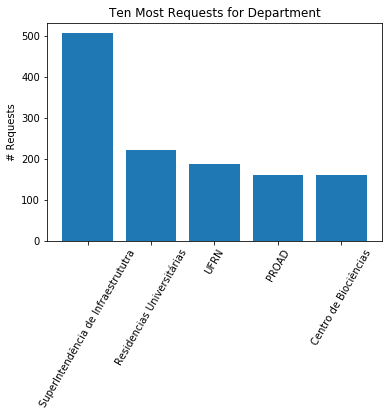

In [46]:
# To better visualize the difference between amount of requests, we shall plot
# some graphs on bars for compare.

# Create a subplot that returns both figure and axis.
fig, ax = plt.subplots()

# Imported function from numpy to set axis positions.
from numpy import arange
bar_positions = arange(5) + 1

# Define x_ticks, which represents each bar and it's titles.
tick_positions = range(1,6)
ax.set_title("Ten Most Requests for Department")
ax.set_xticks(tick_positions)
ax.set_ylabel("# Requests")

x_names = ['SuperIntendência de Infraestrututra', 'Residencias Universitárias', 'UFRN', 'PROAD', 'Centro de Biociências']
ax.set_xticklabels(x_names, rotation=60)

# So, finally we give to bars the respectively amount of requests from each department.
num_cols = [five_most_1, five_most_2, five_most_3, five_most_4, five_most_5]
bar_heights = num_cols
ax.bar(bar_positions, bar_heights, 0.8)

plt.show()
# This bar plot shows the 5 departments that requested the most for works.
# It makes obvious that 'SuperIntendência de Infraestrutura' made lots of requests,
# specially if compared with the others from the top 5.